# Introduction to Deep Learning, HW 1 Template
This document gives a suggested outline for the coding assignment.  Please see the assignment pdf for a more complete description of the assignment.

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Yifan Li

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Problem 2: Algorithmic Implementation of a Multi-Class Logistic Regression without Tensorflow (30 Points)

Succintly, for this problem we have an input image that we have vectorized to have $p=784$ features, and the output space is $C=10$ dimensional.  To get the full details on logistic regression, please visit the example codes and and the lectures.  Succinctly, the multiclass logistic regression model is as follows:

$$\mathbf{\gamma}=\mathbf{W}\mathbf{x}+\mathbf{b},\quad \mathbf{W}\in\mathbb{R}^{C\times p},\quad \mathbf{b}\in\mathbb{R}^{C}$$
$$ p(y=j)=\text{softmax}(\mathbf{\gamma})_j$$
$$\ell(y,\gamma)=\sum_{j=1}^C1_{(y=j)}\log(\text{softmax}(\mathbf{\gamma})_j)$$
or, if $\mathbf{r}$ is a one-hot encoding of $y$, then
$$\ell(r,\gamma)=\mathbf{r}\cdot \log(\text{softmax}(\mathbf{\gamma}))$$
We want to implement this model in more basic codes and learn it to build a better understanding of what's going on before moving to using deep learning toolkits.

In is permissable in the context of this problem to use the MNIST dataset and minibatcher from Tensorflow, which should reduce the amount of bespoke coding that you have to do.

Note that this function is depreciated, but it will work for now.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Visualizing the data to make sure that its understood:

Training image data:  (55000, 784)
Testing image data:  (10000, 784)
28 x 28 =  784

Train image 1 is labelled one-hot as [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


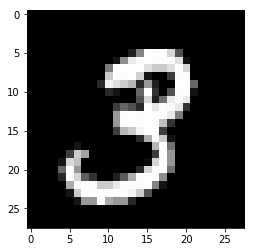

In [3]:
# Dataset statistics# Datas 
print('Training image data: ', mnist.train.images.shape)
print('Testing image data: ', mnist.test.images.shape)
print('28 x 28 = ', 28*28)

# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(mnist.train.labels[1,:]))
image = np.reshape(mnist.train.images[1,:],[28,28])
plt.imshow(image, cmap='gray')

You can pull a new data example from MNIST by the following:

Note that the digit will change each time you run this because it is randomly sampling.


Train image 1 is labelled one-hot as [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


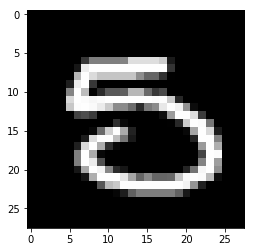

In [4]:
current_data=mnist.train.next_batch(1)
# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(current_data[1]))
image = np.reshape(current_data[0],[28,28])
plt.imshow(image, cmap='gray')

Below are the functions that you need to define to make this work.

In [5]:
def lr_gradient(current_parameters, batch_xs, batch_ys):
    # calculate the gradient on the data
    
    # Forward propagation
    z = batch_xs.dot(current_parameters[0]) + current_parameters[1] # z = Wx+b
    probs = softmax(z)
    # Backpropagation
    delta = probs - batch_ys
    W_grad = (batch_xs.T).dot(delta)
    b_grad = np.sum(delta, axis=0, keepdims=True)
    
    return W_grad, b_grad


def softmax(z):
    exp = np.exp(z-np.max(z, axis=1).reshape((-1,1)))
    norms = np.sum(exp, axis=1).reshape((-1,1))
    return exp / norms

In [6]:
def lr_loss(current_parameters,batch_xs, batch_ys):
    # calculate the loss
    
    z = batch_xs.dot(current_parameters[0]) + current_parameters[1] # z = Wx+b
    probs = softmax(z)
    avg_loss = - np.sum(batch_ys * np.log(probs))/100
    
    return avg_loss

Run the stochastic gradient descent optimization loop.  Note that you need to fill in the values to make this work well.

In [7]:
max_iterations = 10000 # choose the max number of iterations
step_size = 0.05 # choose your step size
W = np.zeros((784, 10)) # choose your starting parameters (connection weights)
b = np.zeros(10) # choose your starting parameters (biases)
training_loss_history=[]
for iter in range(max_iterations):  
    batch_xs, batch_ys = mnist.train.next_batch(100)
    current_parameters = [W, b]
    # note you need to change this to your preferred data format.
    W_grad,b_grad=lr_gradient(current_parameters,batch_xs, batch_ys)
    training_loss_history.append(lr_loss(current_parameters,batch_xs, batch_ys))
    W=W-step_size*W_grad
    b=b-step_size*b_grad

It can be a helpful diagnostic tool to visualize the learning curve:

Text(0.5,1,'Average loss vs. iterations')

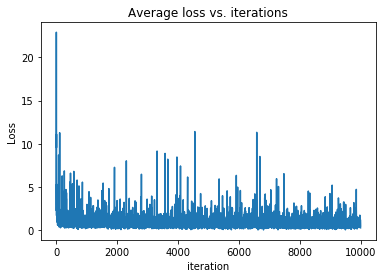

In [8]:
plt.plot(training_loss_history)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Average loss vs. iterations')

Calculate both your training loss and accuracy and your validation loss and accuracy

In [9]:
# Training set
z_train = mnist.train.images.dot(W) + b # z = Wx+b
probs_train = softmax(z_train) # y^ = softmax(z)
num_train = mnist.train.images.shape[0] # number of training set data points
correct = 0
for i in range(0, num_train-1):
    if np.argmax(probs_train[i]) == np.argmax(mnist.train.labels[i]):
        correct += 1
        
train_accuracy = correct / num_train
avg_loss_train = - np.sum(mnist.train.labels * np.log(probs_train))/num_train
print('Avg training loss: %f, training accuracy: %f' %(avg_loss_train, train_accuracy))

# Validation set
z_validation = mnist.validation.images.dot(W) + b # z = Wx+b
probs_validation = softmax(z_validation)
num_validation = mnist.validation.images.shape[0]
correct = 0
for i in range(0, num_validation-1):
    if np.argmax(probs_validation[i]) == np.argmax(mnist.validation.labels[i]):
        correct += 1
        
validation_accuracy = correct / num_validation
avg_loss_validation = - np.sum(mnist.validation.labels * np.log(probs_validation))/num_validation
print('Avg validation loss: %f, validation accuracy: %f' %(avg_loss_validation, validation_accuracy))


# Test set
z_test = mnist.test.images.dot(W) + b
probs_test = softmax(z_test)
num_test = mnist.test.images.shape[0]
correct = 0
for i in range(0, num_test-1):
    if np.argmax(probs_test[i]) == np.argmax(mnist.test.labels[i]):
        correct += 1
        
test_accuracy = correct / num_test
avg_loss_test = - np.sum(mnist.test.labels * np.log(probs_test))/num_test
print('Avg test loss: %f, test accuracy: %f' %(avg_loss_test, test_accuracy))

Avg training loss: 0.713565, training accuracy: 0.894200
Avg validation loss: 0.800189, validation accuracy: 0.892200
Avg test loss: 0.849438, test accuracy: 0.886300


## Problem 3: Algorithmic Implementation of a Multi-Class Logistic Regression with Tensorflow (30 Points)
As above, but now you are allowed to use tensorflow to perform model learning.

### (a)	Set up a logistic regression network, and learn it on MNIST using stochastic gradient descent.

In [10]:
# Modeling Definition
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Create the model
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10]) #true labels
y = tf.matmul(x, W) + b
# Define loss and optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
# Learning
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys}) # fill in the placeholders
    if i % 1000 == 0 or i == 9999: # Evaluation
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print('Iter: {}: validation accuracy: {}'.format(i, sess.run(accuracy, feed_dict={x: mnist.validation.images, y_: mnist.validation.labels})))

Iter: 0: validation accuracy: 0.3508000075817108
Iter: 1000: validation accuracy: 0.8999999761581421
Iter: 2000: validation accuracy: 0.9120000004768372
Iter: 3000: validation accuracy: 0.9154000282287598
Iter: 4000: validation accuracy: 0.9175999760627747
Iter: 5000: validation accuracy: 0.9204000234603882
Iter: 6000: validation accuracy: 0.9228000044822693
Iter: 7000: validation accuracy: 0.9240000247955322
Iter: 8000: validation accuracy: 0.9223999977111816
Iter: 9000: validation accuracy: 0.9246000051498413
Iter: 9999: validation accuracy: 0.9254000186920166


In [12]:
# Evaluation
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))
sess.close()

Test accuracy: 0.9225999712944031


### (b)	Set up an MLP with a single hidden layer (you can choose the number of hidden nodes) and learn it on MNIST using stochastic gradient descent.

In [13]:
# Modeling Definition
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Create the model
n_hidden = 256 # number of hidden nodes
W1 = tf.Variable(initial_value=tf.truncated_normal([784,n_hidden], stddev=0.1)) #layer 1
b1 = tf.Variable(tf.zeros([n_hidden]))
W2 = tf.Variable(initial_value=tf.truncated_normal([n_hidden, 10], stddev=0.1)) #layer 2
b2 = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10]) #true labels

z = tf.nn.relu(tf.matmul(x, W1) + b1)
y = tf.matmul(z, W2) + b2

# Define loss and optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
# Learning
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys}) # fill in the placeholders
    if i % 1000 == 0 or i == 9999: # Evaluation
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print('Iter: {}: validation accuracy: {}'.format(i, sess.run(accuracy, feed_dict={x: mnist.validation.images, y_: mnist.validation.labels})))

Iter: 0: validation accuracy: 0.24740000069141388
Iter: 1000: validation accuracy: 0.9291999936103821
Iter: 2000: validation accuracy: 0.9448000192642212
Iter: 3000: validation accuracy: 0.9535999894142151
Iter: 4000: validation accuracy: 0.9620000123977661
Iter: 5000: validation accuracy: 0.9638000130653381
Iter: 6000: validation accuracy: 0.9679999947547913
Iter: 7000: validation accuracy: 0.9688000082969666
Iter: 8000: validation accuracy: 0.9711999893188477
Iter: 9000: validation accuracy: 0.973800003528595
Iter: 9999: validation accuracy: 0.9729999899864197


In [15]:
# Evaluation
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))
sess.close()

Test accuracy: 0.9736999869346619


### (c)	Set up an MLP with two hidden layers (i.e. lecture 2, slide 55)

In [16]:
# Modeling Definition
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10]) #true labels

n_hidden_1 = 256 # number of hidden nodes in hidden layer 1
n_hidden_2 = 64 # number of hidden nodes in hidden layer 2
W1 = tf.Variable(initial_value=tf.truncated_normal([784, n_hidden_1], stddev=0.1)) #layer 1
b1 = tf.Variable(tf.zeros([n_hidden_1]))
z1 = tf.nn.relu(tf.matmul(x, W1) + b1)
W2 = tf.Variable(initial_value=tf.truncated_normal([n_hidden_1, n_hidden_2], stddev=0.1)) #layer 2
b2 = tf.Variable(tf.zeros([n_hidden_2]))
z2 = tf.nn.relu(tf.matmul(z1, W2) + b2)
W3 = tf.Variable(initial_value=tf.truncated_normal([n_hidden_2, 10], stddev=0.1)) #layer 3
b3 = tf.Variable(tf.zeros([10]))
y = tf.matmul(z2, W3) + b3

# Define loss and optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
# Learning
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys}) # fill in the placeholders
    if i % 1000 == 0 or i == 9999: # Evaluation
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print('Iter: {}: validation accuracy: {}'.format(i, sess.run(accuracy, feed_dict={x: mnist.validation.images, y_: mnist.validation.labels})))

Iter: 0: validation accuracy: 0.14159999787807465
Iter: 1000: validation accuracy: 0.9368000030517578
Iter: 2000: validation accuracy: 0.9549999833106995
Iter: 3000: validation accuracy: 0.9610000252723694
Iter: 4000: validation accuracy: 0.9652000069618225
Iter: 5000: validation accuracy: 0.9697999954223633
Iter: 6000: validation accuracy: 0.972000002861023
Iter: 7000: validation accuracy: 0.9747999906539917
Iter: 8000: validation accuracy: 0.9757999777793884
Iter: 9000: validation accuracy: 0.9760000109672546
Iter: 9999: validation accuracy: 0.9775999784469604


In [18]:
# Evaluation
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))
sess.close()

Test accuracy: 0.9751999974250793


## Problem 4: Performance Comparison (20 points)

### (a)	Did your implementations and Tensorflow’s implementations from problems 2 and 3 perform the same?

Both implementations work, but Tensorflow's implementation gives better accuracy when keeping learning rate and number of iterations the same. My implementation has an test accuracy of about 89%, while Tensorflow's version is about 3 percent higher. Results were shown in previous problems.

### (b)	What is the validation accuracy from the multi-class logistic regression?

The validation accuracy from the multi-class logistic regression is about 92%, as shown in problem 3(a). The accuracy is pretty decent, possibly due to the large number of iterations chosen (10000). The machine is able to learn all parameters quickly, given the simple network.

### (c)	What is the validation accuracy from the multi-class MLP with a single hidden layer?  If you change the number of nodes in the hidden layer, how susceptible is the hold out performance?

When the number of hidden nodes is set to 256, the validation accuracy from the multi-class MLP with a single hidden layer is about 97.2%, as we can see from the test results shown in problem 3(b). We can see an obvious accuracy improvement, but the machine learns and updates all parameters much slower due to the increased complexity of the network. In general, a larger number of hidden nodes yields higher accuracy, but will eventually converge. Larger number of nodes will also increase the complexity of the model and thus increase the computational cost.

### (d)	What is the validation accuracy from the multi-class MLP with two hidden layer?  If you change the number of nodes in the hidden layers, how susceptible is the hold out performance?

When the number of hidden nodes is set to 256 and 64 respectively, the validation accuracy from the multi-class MLP with 2 hidden layers is about 97.5%, as we can see from the test results shown in problem 3(c). We can see a further accuracy improvement, but at a cost of even slower learning speed/higher computational cost. This MLP with 2 hidden layers is quite complex, and the accuracy only varies a little bit when changing the number of hidden nodes.

### (e)	Do you match my reported accuracies (lecture 2, slide 58)?

The results match, and the results that I got were even higher, possibly due to the large number of iterations used. The MLP with 1 hidden layer produces the accuracy of ~96% (I got 97%), and the simple MLP without hidden layers has an accuracy of ~91% (I got 92%).